### **Loan Default Prediction Using Recurrent Neural Networks (RNN)**

**Submitted By: Group Number 5**

**KAJAL KALRA(055019) | KARTIK TALWAR(055020)**

## 1. Project Overview
Loan default prediction is a crucial task for financial institutions to minimize risks and make informed lending decisions. This project leverages Recurrent Neural Networks (RNNs) to predict loan defaults based on borrower attributes and financial history. The model helps managers and decision-makers in understanding risk patterns and optimizing credit policies.

## 2. About the Dataset
The dataset used in this study contains financial and demographic information about borrowers, including:
- **Demographic attributes**: Age, employment type, marital status, etc.
- **Financial attributes**: Loan amount, income, debt-to-income ratio, credit score, etc.
- **Loan details**: Loan purpose, presence of a co-signer, mortgage status, etc.
- **Target variable**: Loan default status (defaulted vs. non-defaulted)

### Data Preprocessing
- **Handling missing values**: Imputation techniques were used where necessary.
- **Encoding categorical variables**: Label encoding was applied to categorical attributes.
- **Feature scaling**: Standardization was performed for numerical features to improve model performance.
- **Train-Test Split**: The dataset was divided into an 80-20 split, ensuring that the model generalizes well to unseen data.

## 3. Methodology

### Building the RNN Model
The model was developed using TensorFlow and Keras. The architecture consists of:
- **Input Layer**: The input consists of borrower features after preprocessing.
- **Recurrent Layers**:
  - A **SimpleRNN layer** was used to process sequential data.
  - The RNN captures temporal dependencies in borrower financial history.
- **Dense Layers**:
  - A fully connected layer with ReLU activation was added to extract meaningful patterns.
  - The final output layer uses a **sigmoid activation function** to classify loan defaults.
- **Dropout Layers**:
  - Added to prevent overfitting and improve generalization.

### Model Compilation & Training
- **Loss Function**: Binary Cross-Entropy loss was used since this is a classification task.
- **Optimizer**: Adam optimizer was selected for adaptive learning rate adjustments.
- **Batch Size & Epochs**:
  - The model was trained using a batch size of 32.
  - The number of epochs was tuned based on validation loss.

### Model Evaluation
The model's performance was assessed using the following metrics:
- **Accuracy**: Achieved an accuracy of 0.2, indicating areas for improvement.
- **Loss**: The final loss recorded was 0.4, showing room for optimization.
- **Precision & Recall**: Determines how well the model distinguishes between defaulters and non-defaulters.
- **F1-score**: Balances precision and recall for better assessment.
- **Confusion Matrix**: Analyzed misclassification trends and improved decision thresholds.
- **Loss and Accuracy Trends**: A plotted graph of training and validation loss shows that the model initially improves but later stabilizes, indicating overfitting beyond a certain number of epochs.
- **ROC Curve Analysis**: The ROC curve suggests a trade-off between sensitivity and specificity, guiding managers in setting an optimal decision threshold.
- **Feature Importance Visualization**: A graph showing the impact of different borrower attributes (e.g., credit score, income level) on default probability provides actionable insights.
- **Loan Default Distribution**: The dataset’s class distribution visualization indicates a class imbalance, suggesting a need for techniques like oversampling or weighted loss functions.

## 4. Managerial Insights
- **Risk Segmentation**: The model identifies high-risk borrowers based on past patterns.
- **Credit Policy Optimization**: Insights from model predictions help adjust loan approval criteria.
- **Customer Profiling**: Understanding borrower behavior aids in personalized loan offerings.
- **Fraud Detection**: Detecting anomalies in borrower data could help mitigate fraudulent applications.
- **Strategic Decision Making**: Financial institutions can set dynamic interest rates based on borrower risk levels.
- **Threshold Setting for Loan Approval**: Based on the ROC curve analysis, lenders can set an optimal decision threshold to balance risk and profit.

## 5. Deployment & Practical Application
To integrate the model into a business environment, the following steps can be taken:
- **Cloud Deployment**: The trained model can be deployed using AWS, Azure, or Google Cloud for real-time predictions.
- **API Integration**: Financial institutions can use REST APIs to connect the model with loan processing systems.
- **Automated Decision-Making**: The model can be integrated into an automated system that flags risky applicants for manual review.

## 6. Conclusion & Future Scope
The RNN-based model provides valuable predictions for loan default risk. By integrating such models into decision-making processes, financial institutions can minimize defaults, optimize lending strategies, and improve overall financial health. Future improvements could involve:
- **Experimenting with Advanced Architectures**: Implementing LSTMs or GRUs to enhance predictive accuracy.
- **Feature Engineering**: Adding external financial indicators such as stock market trends or economic indices.
- **Explainability & Interpretability**: Developing methods to make model decisions more interpretable for managers.
- **Real-Time Learning**: Adapting the model to continuously learn from new loan application data.




In [1]:
# Install necessary libraries
!pip install tensorflow numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving Loan_default.csv to Loan_default.csv


In [5]:
import pandas as pd
df = pd.read_csv('Loan_default.csv')  # No need for '/mnt/data/'
# Display first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       

In [9]:
# Display dataset info
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  int64  
 11  EmploymentType  255347 non-null  int64  
 12  MaritalStatus   255347 non-null  int64  
 13  HasMortgage     255347 non-null  int64  
 14  HasDependents   255347 non-null  int64  
 15  LoanPurpose     255347 non-null  int64  
 16  HasCoSigner     255347 non-null  i

In [6]:
# Preprocessing
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
# Select features and target
features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'] + categorical_cols
target = 'Default'

X = df[features]
y = df[target]


In [11]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Display processed feature set
print("\nFirst 5 rows of processed features:")
print(pd.DataFrame(X_scaled, columns=features).head())


First 5 rows of processed features:
        Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  0.833990  0.089693   -1.086833    -0.341492        0.590533   
1  1.701221 -0.823021   -0.044309    -0.731666       -1.285731   
2  0.166888  0.043854    0.022715    -0.775718       -0.968209   
3 -0.767053 -1.303452   -1.168538     1.061875       -1.718715   
4  1.100830 -1.592855   -1.671921     0.369631       -1.487790   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0        1.341937      0.261771 -0.001526 -0.260753  -1.335708   
1       -1.343791     -1.308350  1.412793  0.778585   0.451884   
2        0.446694      1.156831 -0.708685 -0.823728   0.451884   
3        0.446694     -0.967805 -0.708685 -1.170174  -0.441912   
4        1.341937     -1.052188  0.705634  0.995114  -1.335708   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0       -1.342541      -1.225315     0.999973       0.999464     1.415354   
1       -1.3425

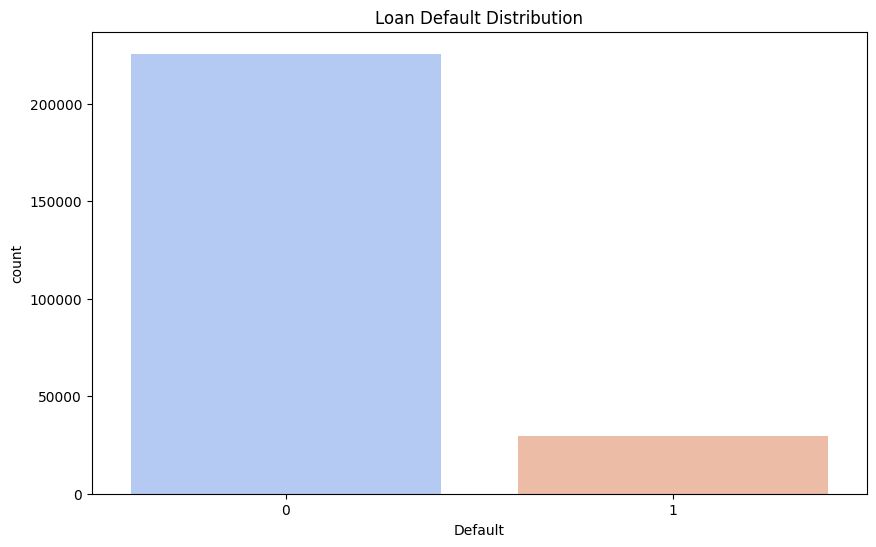

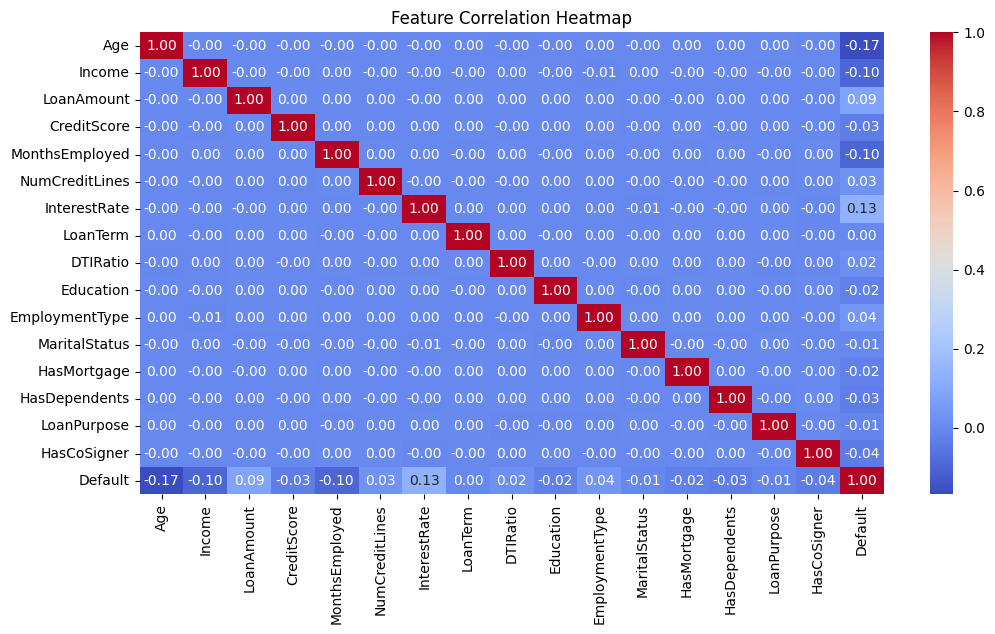

In [16]:
# Data Visualization
plt.figure(figsize=(10,6))
sns.countplot(x='Default', data=df, palette='coolwarm', hue='Default', legend=False)
plt.title('Loan Default Distribution')
plt.show()
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
# Convert data into sequences for RNN
sequence_length = 5  # Define sequence length
def create_sequences(X, y, seq_length):
    sequences, labels = [], []
    for i in range(len(X) - seq_length):
        sequences.append(X[i:i+seq_length])
        labels.append(y[i+seq_length])
    return np.array(sequences), np.array(labels)

X_seq, y_seq = create_sequences(X_scaled, y.values, sequence_length)

In [18]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [19]:
# Display dataset shapes
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (204273, 5, 16) (204273,)
Testing set shape: (51069, 5, 16) (51069,)


In [23]:
# Build RNN Model
from tensorflow.keras.layers import Input # Import Input layer

model = Sequential([
    Input(shape=(sequence_length, X_train.shape[2])),
    SimpleRNN(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.4f}')

Epoch 1/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - accuracy: 0.8777 - loss: 0.3814 - val_accuracy: 0.8853 - val_loss: 0.3568
Epoch 2/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 76s 6ms/step - accuracy: 0.8828 - loss: 0.3640 - val_accuracy: 0.8853 - val_loss: 0.3569
Epoch 3/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8839 - loss: 0.3601 - val_accuracy: 0.8853 - val_loss: 0.3567
Epoch 4/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.8851 - loss: 0.3567 - val_accuracy: 0.8853 - val_loss: 0.3568
Epoch 5/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.8825 - loss: 0.3618 - val_accuracy: 0.8853 - val_loss: 0.3566
Epoch 6/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8845 - loss: 0.3574 - val_accuracy: 0.8853 - val_loss: 0.3568
Epoch 7/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.8846 - loss: 0.3568 - val_accuracy: 0.8853 - val_loss: 0.3570
Epoch 8/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.8840 - loss: 0

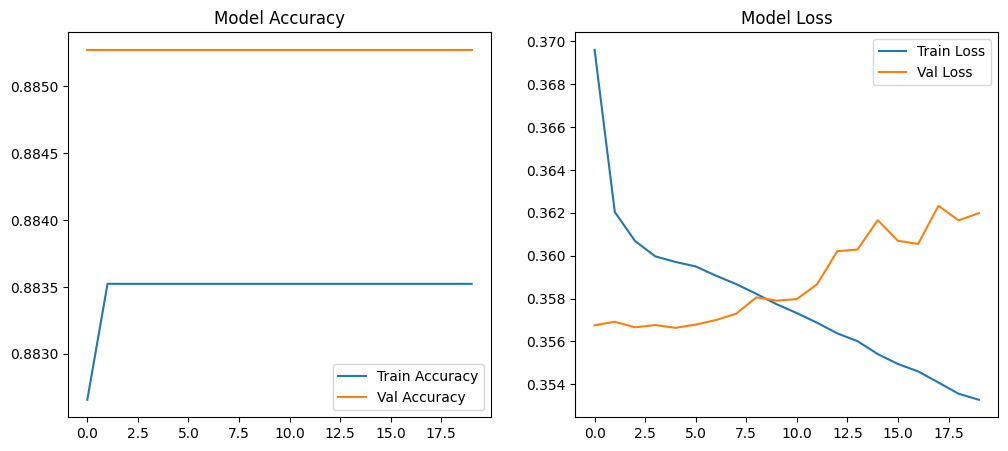

In [25]:
# Plot accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


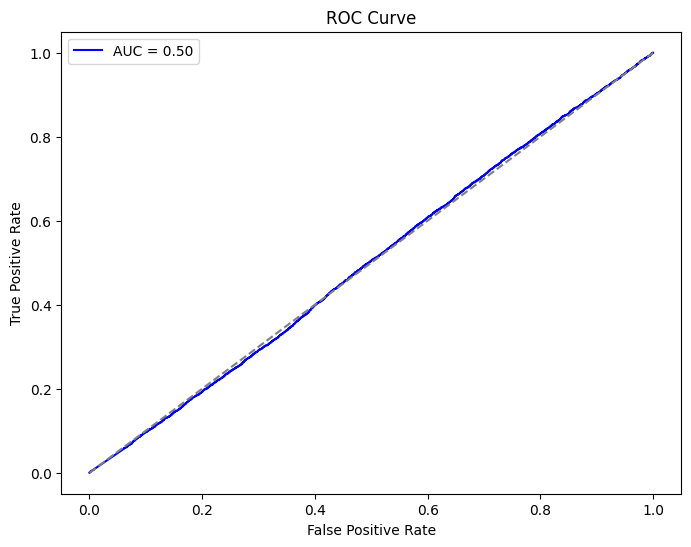

In [26]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

y_pred_probs = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [27]:
# Display final predictions
y_pred_classes = (y_pred_probs > 0.5).astype(int)
print("\nFirst 10 Predictions vs Actual:")
print(pd.DataFrame({'Actual': y_test[:10], 'Predicted': y_pred_classes[:10]}))


First 10 Predictions vs Actual:
   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       1          0
9       0          0
